# **Lab 2.3: Visualization**

<hr>

## **1. Objective**
In this practice, we will use the dataset generated in the previous practice and visualize various data in order to extract knowledge.
To do this, we will need to install new libraries in our conda environment.

##### **Matplotlib**

A library that allows the creation of a wide variety of plots, including:

* Histograms.
* Scatter plots.
* Bar charts.
* Heatmaps.
* Etc.

It offers multiple customization options.
Once created, the plots can be exported in many formats (jpg, png, pdf...)

Example: https://matplotlib.org/gallery/lines_bars_and_markers/scatter_demo2.html#sphx-glr-gallery-lines-bars-and-markers-scatter-demo2-py

*To install it:*

In [1]:
! pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------- ----------------------- 3.4/8.1 MB 18.3 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 25.1 MB/s  0:00:00
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 80.5 MB/s  0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------- 7.0/7.0 MB 72.0 MB/s  0:00:00

   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----------------- ---------------------- 3/7 [fonttools]
   ----------------- ---------------------- 3/7 [fonttools]
   ----------------- ---------------------- 3/7 [fonttools]
   ----------------- -------

##### **Seaborn**

Based on Matplotlib, this library acts as a high-level interface over the former.
This greatly simplifies the most common operations.
It also adds new types of plots.

Example: https://seaborn.pydata.org/examples/scatter_bubbles.html

*To install it:*

In [2]:
! pip install seaborn

##### **Bokeh**

Unlike the previous ones, Bokeh allows the creation of interactive plots.
Thanks to this, we can modify the plot once it's created.

Example: https://demo.bokeh.org/crossfilter

*To install it:*

In [3]:
! pip install bokeh

   ---------------------------------------- 0.0/7.2 MB ? eta -:--:--
   ---------------------------------------- 7.2/7.2 MB 73.9 MB/s  0:00:00

   ------------- -------------------------- 1/3 [narwhals]
   ------------- -------------------------- 1/3 [narwhals]
   ------------- -------------------------- 1/3 [narwhals]
   ------------- -------------------------- 1/3 [narwhals]
   ------------- -------------------------- 1/3 [narwhals]
   ------------- -------------------------- 1/3 [narwhals]
   ------------- -------------------------- 1/3 [narwhals]
   ------------- -------------------------- 1/3 [narwhals]
   -------------------------- ------------- 2/3 [bokeh]
   -------------------------- ------------- 2/3 [bokeh]
   -------------------------- ------------- 2/3 [bokeh]
   -------------------------- ------------- 2/3 [bokeh]
   -------------------------- ------------- 2/3 [bokeh]
   -------------------------- ------------- 2/3 [bokeh]
   -------------------------- ------------- 2/3 

<hr>

## **2. Data Visualization**

The first thing we need to do is load the data from the previous practice.

In [7]:
import pandas as pd
data = pd.read_pickle('../../../datasets/f1_23_monaco.pkl')

<div class="alert alert-block alert-info">
    <b>Exercise:</b> Verify that the data types are correct.
</div>

In [8]:
# Your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   Time            1259 non-null   timedelta64[ns]
 1   Driver          1259 non-null   object         
 2   DriverNumber    1259 non-null   int64          
 3   LapTime         1259 non-null   timedelta64[ns]
 4   LapNumber       1259 non-null   int64          
 5   Stint           1259 non-null   int64          
 6   Sector1Time     1259 non-null   timedelta64[ns]
 7   Sector2Time     1259 non-null   timedelta64[ns]
 8   Sector3Time     1259 non-null   timedelta64[ns]
 9   SpeedI1         1149 non-null   float64        
 10  SpeedI2         1259 non-null   float64        
 11  SpeedFL         1259 non-null   float64        
 12  SpeedST         1259 non-null   float64        
 13  IsPersonalBest  1259 non-null   bool           
 14  Compound        1259 non-null   object  

### **2.1. Static Visualization**
We will begin with static visualization, which does not allow manipulating the graph once it is generated.

First, we will load the libraries and set some variables that will be used throughout the practice.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') # Sets the style of the plots
import bokeh as bk

# Graph size
fig_size = (12,6)

# Dictionary of colors for each team, driver, and tire
team_colors = {'Red Bull Racing': '#1E41FF', 'Alpine': '#2293D1', 'Aston Martin': '#006F62', 'Ferrari': '#DC0000', 'Williams': '#005AFF', 'Haas F1 Team': '#787878', 'AlphaTauri': '#2B4562', 'Alfa Romeo': '#900000', 'McLaren': '#FF8700', 'Mercedes': '#6CD3BF'}
driver_colors = {'VER': '#1E41FF', 'GAS': '#2293D1', 'PER': '#1E41FF', 'ALO': '#006F62', 'LEC': '#DC0000', 'STR': '#006F62', 'SAR': '#005AFF', 'MAG': '#787878', 'DEV': '#2B4562', 'TSU': '#2B4562', 'ALB': '#005AFF', 'ZHO': '#900000', 'HUL': '#787878', 'OCO': '#2293D1', 'NOR': '#FF8700', 'HAM': '#6CD3BF', 'SAI': '#DC0000', 'RUS': '#6CD3BF', 'BOT': '#900000', 'PIA': '#FF8700'}
tire_colors = { 'SOFT': '#FF0000', 'HARD': '#cccccc', 'MEDIUM': '#FFD700', 'INTERMEDIATE': '#00A550', 'WET': '#005AFF' }

#### **Distributions**

Distributions are obtained with the aim of showing the possible values that a specific variable can take. Additionally, we can observe the frequency of those values.

_For a single variable:_
* Histogram: `sns.histplot` or `sns.countplot`
* KDE (Kernel Density Estimate): `sns.kdeplot`

The KDE is a smoothed version of a histogram where the y-axis shows the likelihood of finding a value at each point, instead of just counting how many data points exist in each interval.

_For multiple variables:_
* KDE2D: `sns.jointplot`

**Histogram of column 'SpeedI1'.**

Text(0.5, 1.0, 'Histogram of the SpeedI1 variable')

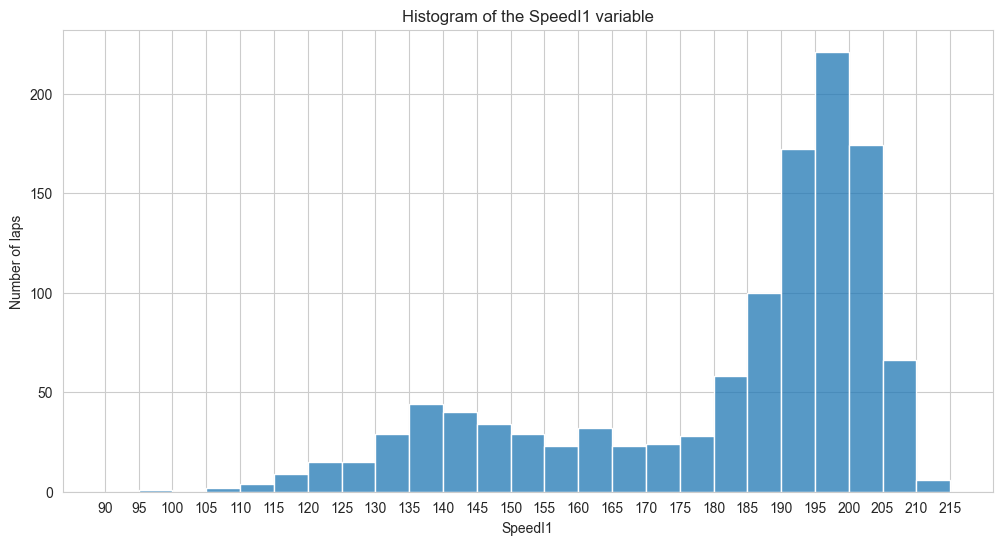

In [10]:
plt.figure(figsize = fig_size); # Size of the plot
hist = sns.histplot(data = data['SpeedI1'], kde = False, bins = range(90, 220, 5));
hist.set_xticks(range(90, 220, 5)); # X-axis labels
hist.set_xlabel('SpeedI1')
hist.set_ylabel('Number of laps')
hist.set_title('Histogram of the ''SpeedI1'' variable')

**Another notation**

Text(0.5, 1.0, 'Histogram of the SpeedI1 variable')

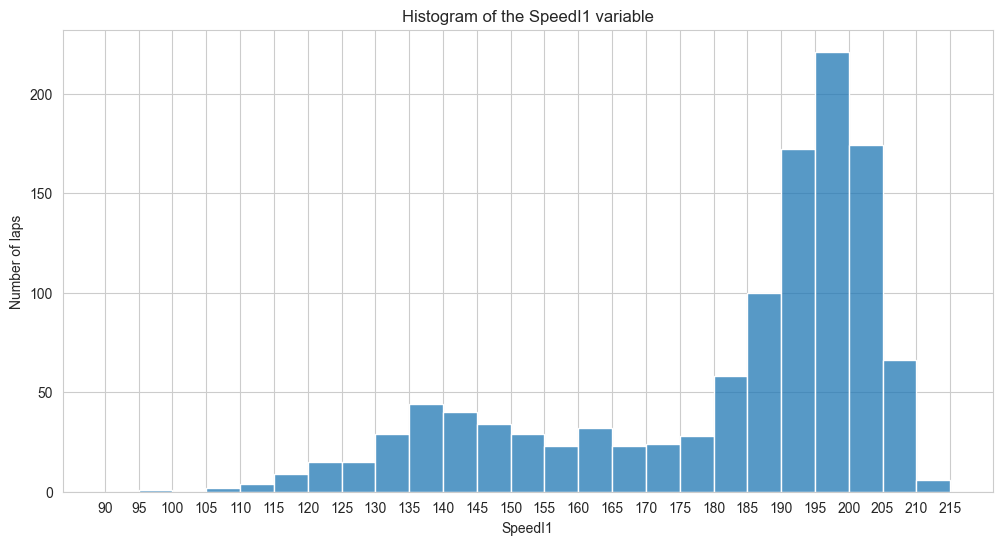

In [11]:
# Another notation
plt.figure(figsize = fig_size);
hist = sns.histplot(data = data, x = 'SpeedI1', kde = False, bins = range(90, 220, 5));
hist.set_xticks(range(90, 220, 5));
hist.set_xlabel('SpeedI1')
hist.set_ylabel('Number of laps')
hist.set_title('Histogram of the ''SpeedI1'' variable')

**Histogram of the number of laps by team**

Team, as you may know, is a categorical variable, which is why we use countplot.

Text(0.5, 1.0, 'Histogram of the Team variable')

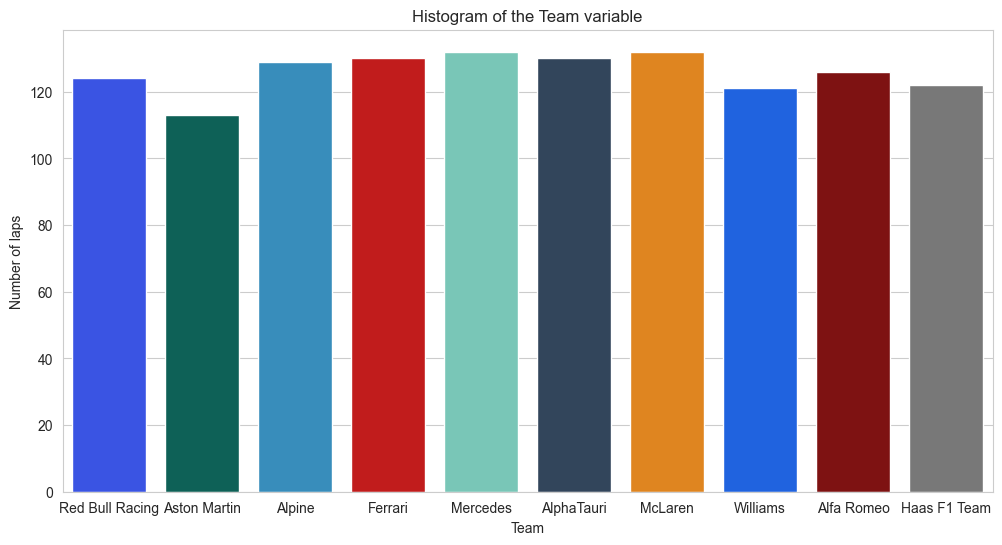

In [12]:
plt.figure(figsize = fig_size); # Size of the plot
hist = sns.countplot(x = data['Team'], hue = data["Team"], palette = team_colors);
hist.set_xlabel('Team')
hist.set_ylabel('Number of laps')
hist.set_title('Histogram of the ''Team'' variable')

**KDE of the speed at the finish line for the drivers: ALO, VER, LEC, and NOR**

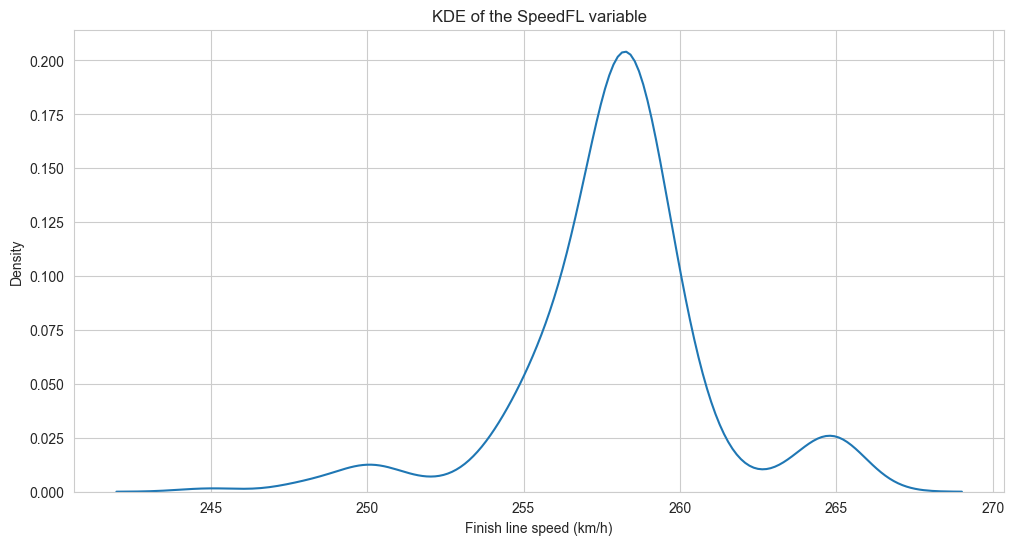

In [13]:
filtered_drivers = data.loc[data['Driver'].isin(['ALO', 'VER', 'LEC', 'NOR'])]

plt.figure(figsize = fig_size)
hist = sns.kdeplot(data = filtered_drivers, x = filtered_drivers['SpeedFL'])
hist.set_xlabel('Finish line speed (km/h)')
hist.set_ylabel('Density')
hist.set_title('KDE of the ''SpeedFL'' variable')
plt.show()

**KDE (separated by driver) of the speed at the finish line for the drivers: ALO, VER, LEC, and NOR**

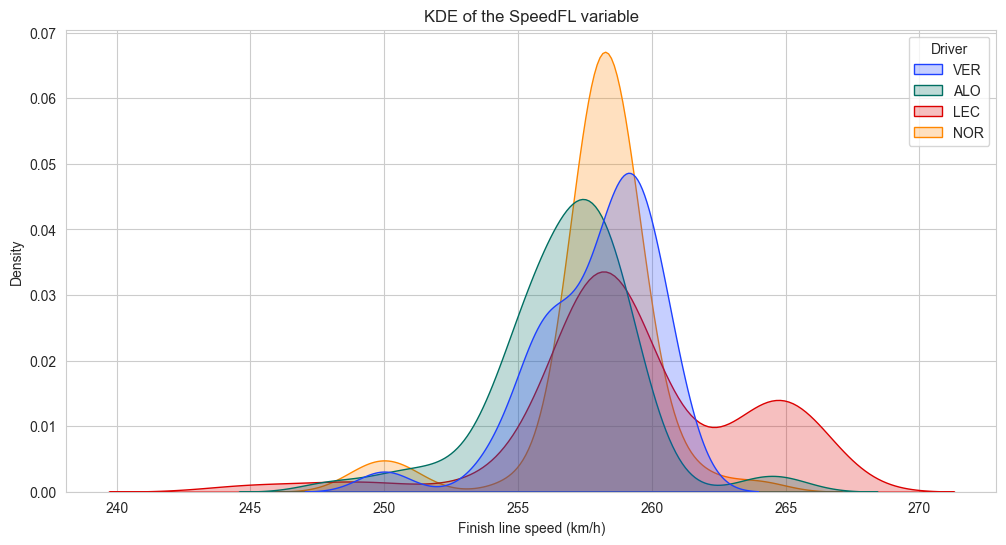

In [14]:
plt.figure(figsize = fig_size)
hist = sns.kdeplot(data = filtered_drivers, x = filtered_drivers['SpeedFL'], hue = 'Driver', palette = driver_colors, fill = True)
hist.set_xlabel('Finish line speed (km/h)')
hist.set_ylabel('Density')
hist.set_title('KDE of the ''SpeedFL'' variable')
plt.show()

**2D KDE (separated by driver) of the time in the first sector versus the third sector for ALO, VER, LEC, and NOR for the first 30 laps**

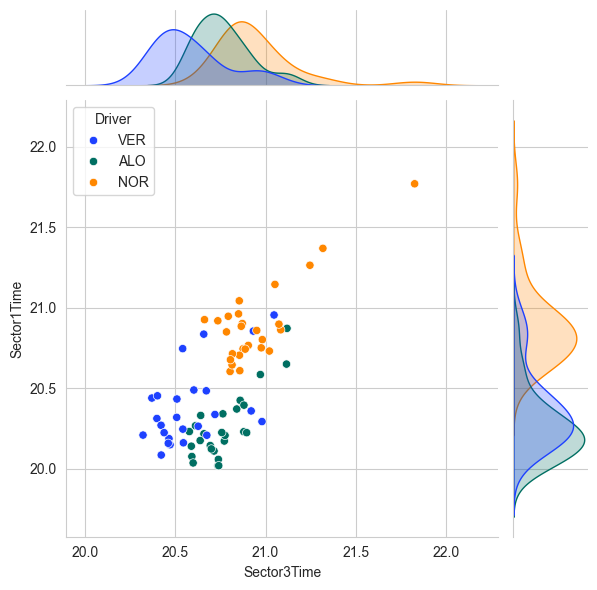

In [15]:
filtered_drivers = data.loc[(data['LapNumber'] <= 30) & (data['Driver'].isin(['VER', 'ALO', 'NOR']))]
hist = sns.jointplot(data = filtered_drivers, x = filtered_drivers['Sector3Time'].dt.total_seconds(), y = filtered_drivers['Sector1Time'].dt.total_seconds(), hue = 'Driver', palette = driver_colors)
plt.show()

<div class="alert alert-block alert-info">
    <b>Exercise:</b> Create a chart with the number of laps completed with each type of tire. Use the already created variable 'tire_colors'.
</div>

Text(0.5, 1.0, 'Histogram of the Tyre Compound variable')

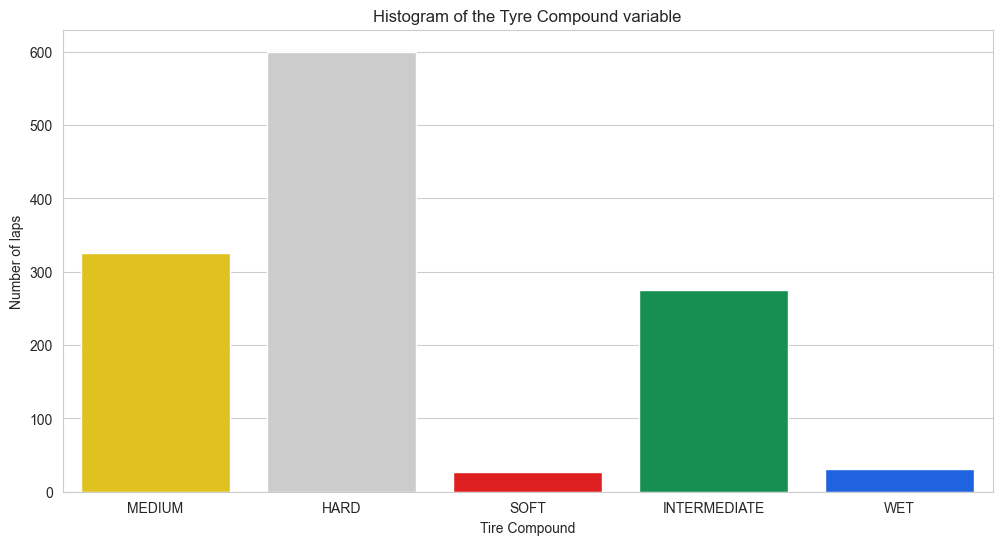

In [17]:
# Your code here
plt.figure(figsize = fig_size); # Size of the plot
hist = sns.countplot(x = data['Compound'], hue = data["Compound"], palette = tire_colors);
hist.set_xlabel('Tire Compound')
hist.set_ylabel('Number of laps')
hist.set_title('Chart with the number of laps completed for each tire type')

<div class="alert alert-block alert-info">
    <b>Exercise:</b> Create a chart with the positions Kevin Magnussen (MAG) has passed through. It should reflect how many laps he has been in each of the 20 positions. All possible positions should appear on the x-axis.
</div>

Text(0.5, 1.0, 'Histogram of the SpeedI1 variable')

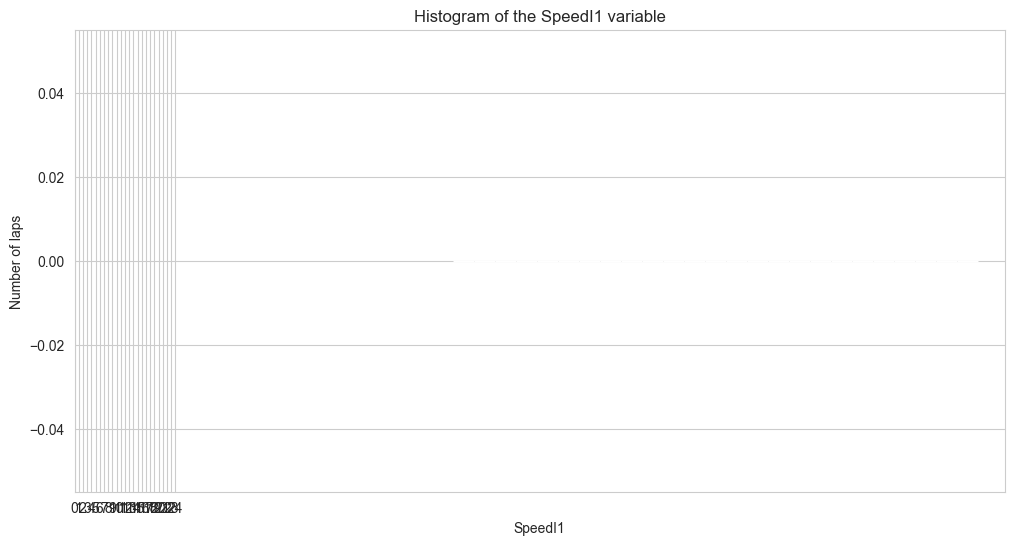

In [47]:
# Your code here
plt.figure(figsize = fig_size);
hist = sns.histplot(data = data[data['Driver'] == 'MAG'], x = 'Position', kde = False, bins = range(90, 220, 5));
hist.set_xticks(range(0, 25, 1));
hist.set_xlabel('SpeedI1')
hist.set_ylabel('Number of laps')
hist.set_title('Histogram of the ''SpeedI1'' variable')

#### **Relationships**

There are multiple types of charts to represent the relationship between variables (2 typically).

_For 2 variables:_
* Bars: `sns.barplot`
* Line: `sns.lineplot`
* Scatter: `sns.scatterplot`
* Regression line: `sns.regplot`

_For more variables:_
* Color and size to represent more information.
* Pairwise: `sns.lineplot`
* 3D visualization: `mpl_toolkits.mplot3d`
* Reduce to 2 variables:
  * PCA (Principal Component Analysis): `sklearn.decomposition.PCA`
  * TSNE (T-distributed Stochastic Neighbor Embedding): `sklearn.manifold.TSNE`

**Bar chart: Relationship between lap time and position.**

Text(0.5, 1.0, 'Relationship between Lap time and Position')

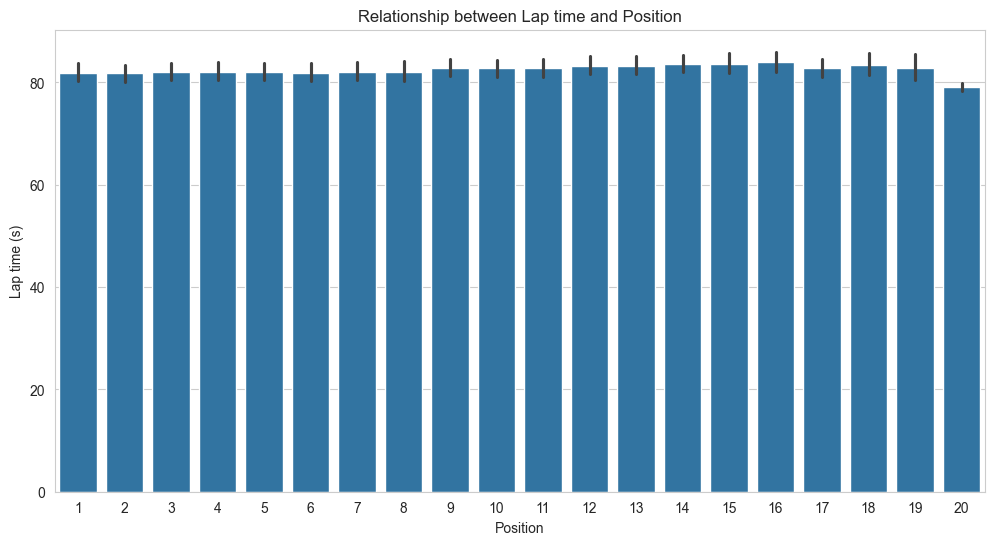

In [48]:
# WE WON'T USE THIS GRAPH MUCH


plt.figure(figsize = fig_size); # Size of the plot
the_plot = sns.barplot(data = data, x = 'Position', y = data['LapTime'].dt.total_seconds())
the_plot.set_xlabel('Position')
the_plot.set_ylabel('Lap time (s)')
the_plot.set_title('Relationship between Lap time and Position')

**Bar chart: Average lap time for each tire.**

Text(0.5, 1.0, 'Relationship between Lap time and Tire')

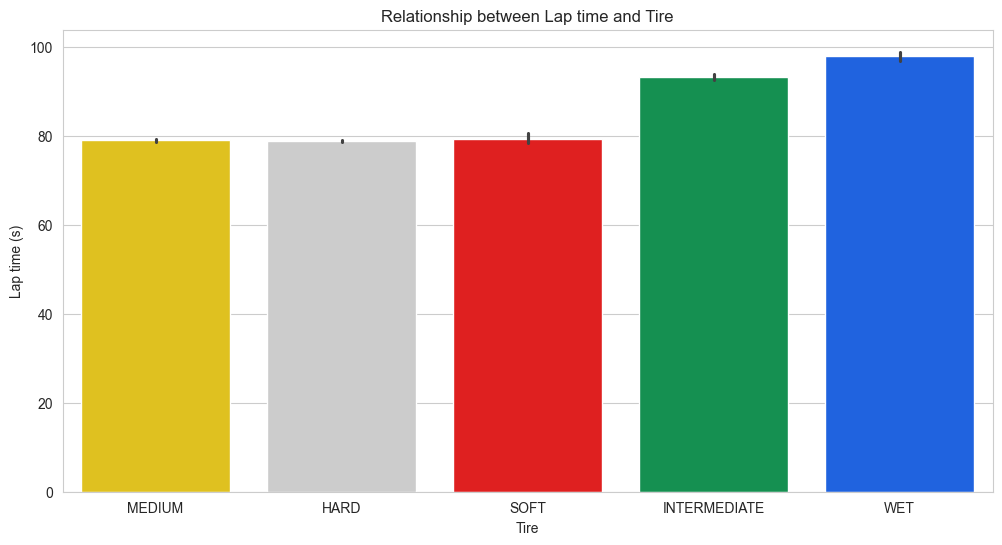

In [49]:
plt.figure(figsize = fig_size); # Size of the plot
the_plot = sns.barplot(data = data, x = 'Compound', y = data['LapTime'].dt.total_seconds(), hue = 'Compound', palette = tire_colors)
the_plot.set_xlabel('Tire')
the_plot.set_ylabel('Lap time (s)')
the_plot.set_title('Relationship between Lap time and Tire')

**Line chart: Relationship between lap time and lap number.**

Text(0.5, 1.0, 'Relationship between Lap time and Lap')

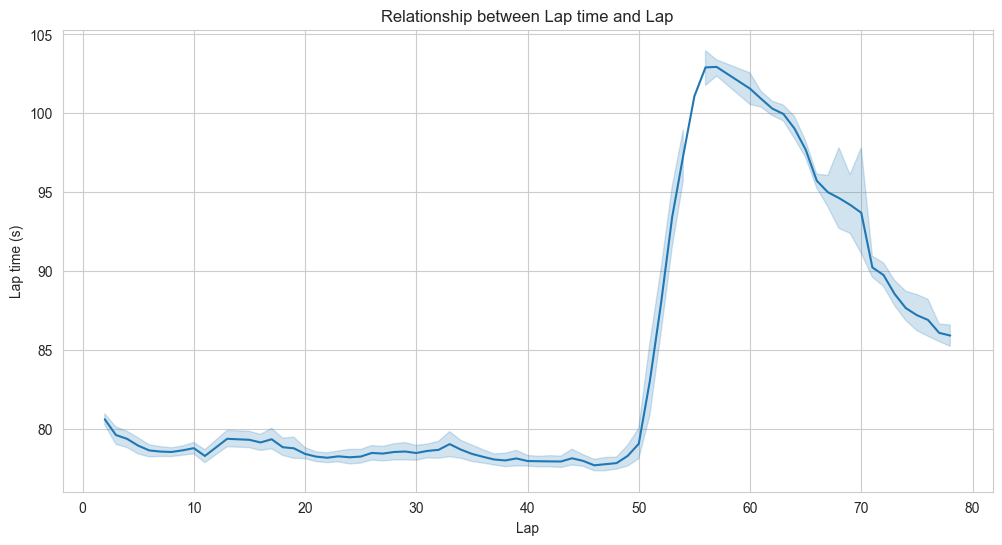

In [50]:
plt.figure(figsize = fig_size); # Size of the plot
the_plot = sns.lineplot(data = data, x = 'LapNumber', y = data['LapTime'].dt.total_seconds())
the_plot.set_xlabel('Lap')
the_plot.set_ylabel('Lap time (s)')
the_plot.set_title('Relationship between Lap time and Lap')

**Scatter plot: Relationship between second sector times and speed at the second detection point by tire.**

Text(0.5, 1.0, 'Relationship between second sector time and speed at second point')

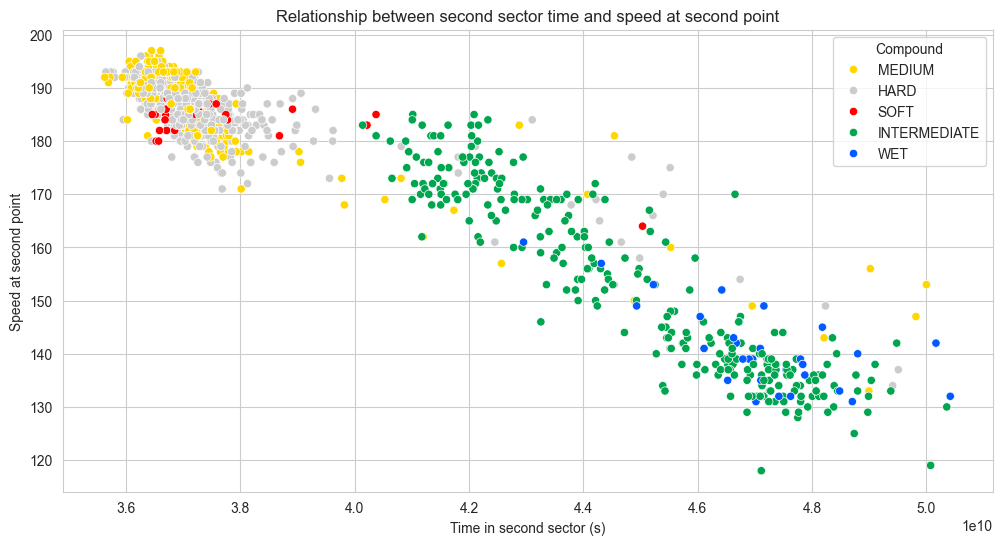

In [51]:
plt.figure(figsize = fig_size); # Size of the plot
the_plot = sns.scatterplot(data = data, x = 'Sector2Time', y = 'SpeedI2', hue = 'Compound', palette = tire_colors);
the_plot.set_ylabel('Speed at second point')
the_plot.set_xlabel('Time in second sector (s)')
the_plot.set_title('Relationship between second sector time and speed at second point')

**Adding the previous trend line**

The appropriate plot is the 'regplot'. This does not support the 'hue' parameter.

Text(0.5, 1.0, 'Relationship between second sector time and speed at second point')

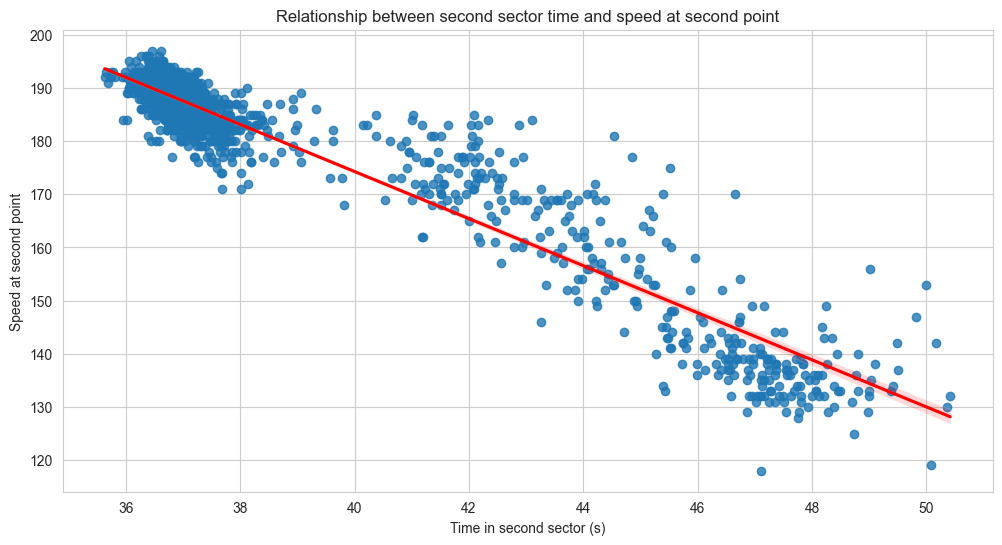

In [52]:
plt.figure(figsize = fig_size); # Size of the plot
the_plot = sns.regplot(data = data, x = data['Sector2Time'].dt.total_seconds(), y = 'SpeedI2', line_kws = {'color': 'red'});
the_plot.set_ylabel('Speed at second point')
the_plot.set_xlabel('Time in second sector (s)')
the_plot.set_title('Relationship between second sector time and speed at second point')

<div class="alert alert-block alert-info">
    <b>Exercise:</b> Obtain the previous plot for the laps after 55.
</div>

Text(0.5, 1.0, 'Relationship between second sector time and speed at second point')

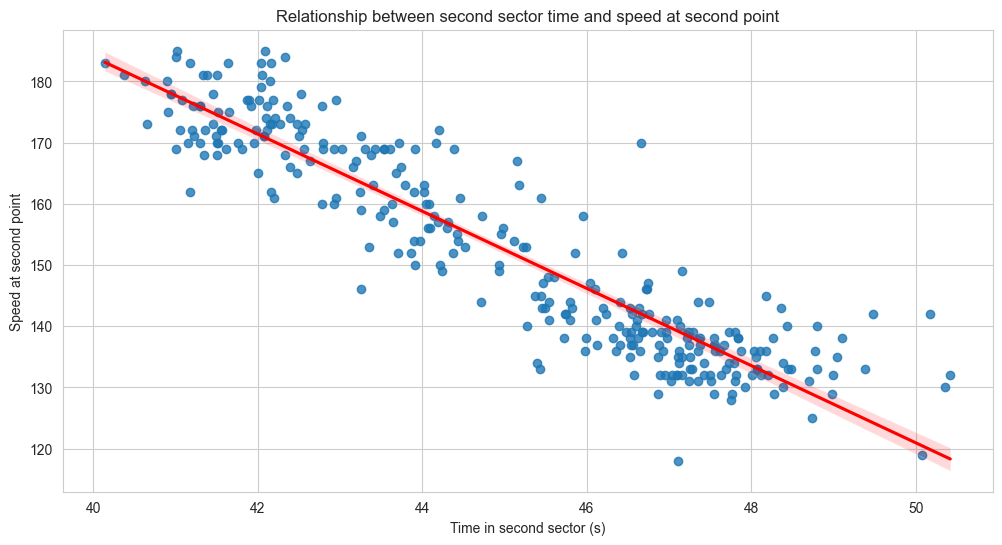

In [58]:
# Your code here
plt.figure(figsize = fig_size); # Size of the plot
filtered_data = data.loc[data["LapNumber"] > 55]
the_plot = sns.regplot(data = filtered_data, x = filtered_data['Sector2Time'].dt.total_seconds(), y = 'SpeedI2', line_kws = {'color': 'red'});
the_plot.set_ylabel('Speed at second point')
the_plot.set_xlabel('Time in second sector (s)')
the_plot.set_title('Relationship between second sector time and speed at second point')

<div class="alert alert-block alert-info">
    <b>Exercise:</b> Create a chart with the average (maximum and minimum) lap time for each driver.
</div>

Text(0.5, 1.0, 'Relationship between Average Lap time and Drivers')

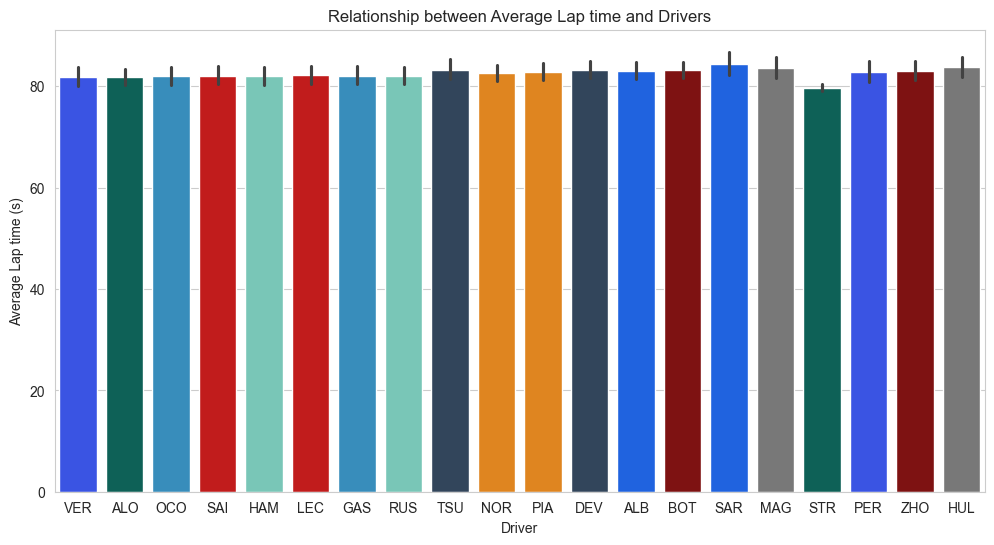

In [71]:
# Your code here
plt.figure(figsize = fig_size); # Size of the plot
the_plot = sns.barplot(data = data, x = 'Driver', y = data['LapTime'].dt.total_seconds(), hue = 'Driver', palette = driver_colors)
the_plot.set_xlabel('Driver')
the_plot.set_ylabel('Average Lap time (s)')
the_plot.set_title('Relationship between Average Lap time and Drivers')

#### **Relationships: *Multiple variables***

**Color and shape to represent more information.**

Text(0.5, 1.0, 'Relationship between Sector 3 and Sector 2 Times')

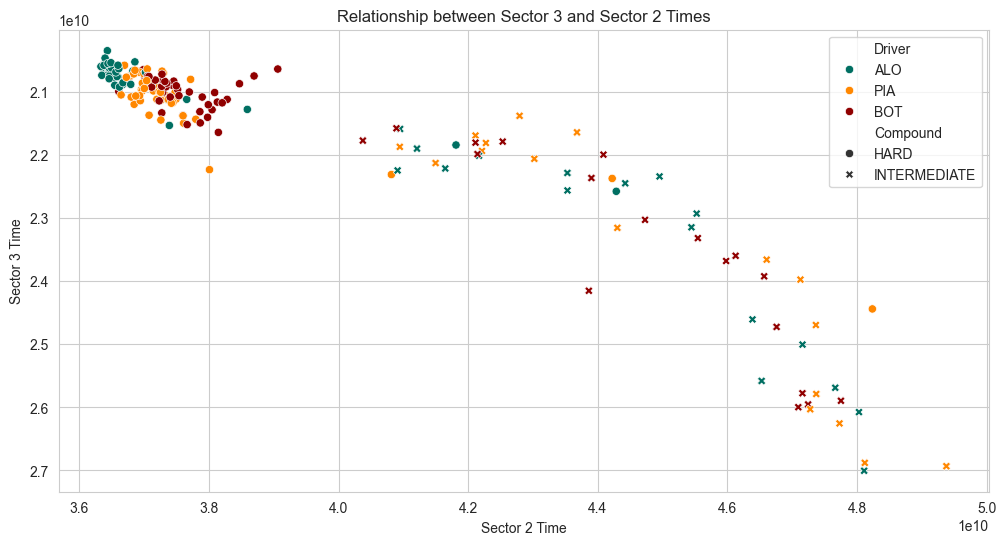

In [60]:
plt.figure(figsize = fig_size); # Size of the plot
plt_data = data.loc[data.Driver.isin(['ALO', 'BOT', 'PIA'])]
the_plot = sns.scatterplot(data = plt_data, x = 'Sector2Time', y = 'Sector3Time', hue = 'Driver', style = 'Compound', palette = driver_colors)
the_plot.set_xlabel('Sector 2 Time')
the_plot.set_ylabel('Sector 3 Time')
the_plot.set_title('Relationship between Sector 3 and Sector 2 Times')

**Pairwise: Relationship between 'SpeedI1', 'SpeedI2', 'SpeedFL'.**

<Figure size 1200x600 with 0 Axes>

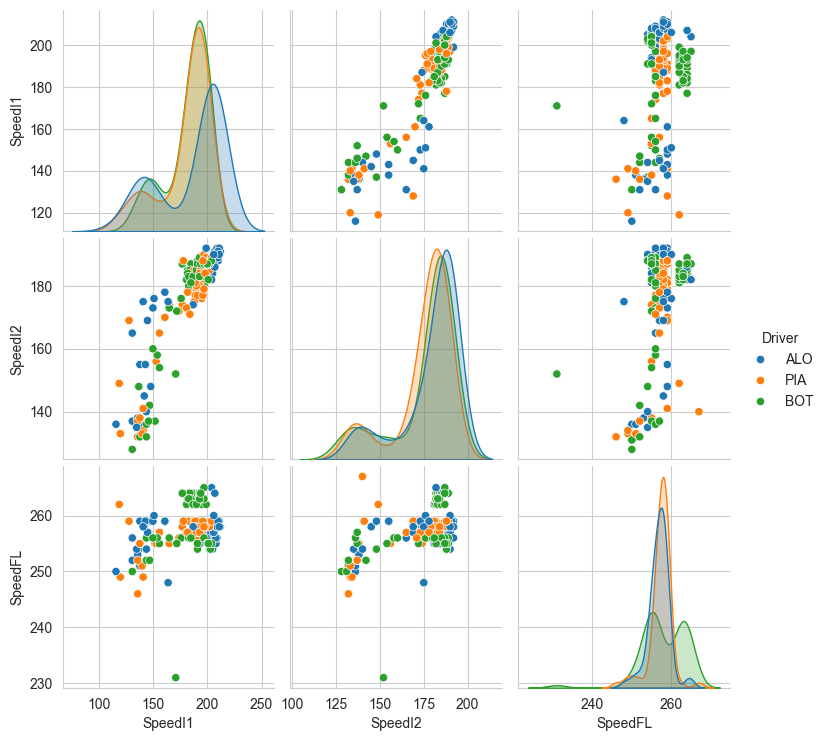

In [61]:
plt.figure(figsize = fig_size); # Size of the plot
plt_data = data.loc[data.Driver.isin(['ALO', 'BOT', 'PIA'])]
the_plot = sns.pairplot(data = plt_data, vars = ['SpeedI1', 'SpeedI2', 'SpeedFL'], hue = 'Driver')

**3D scatter. It is necessary to use the matplotlib library.**

Text(0.5, 0.92, '3D Scatter Plot')

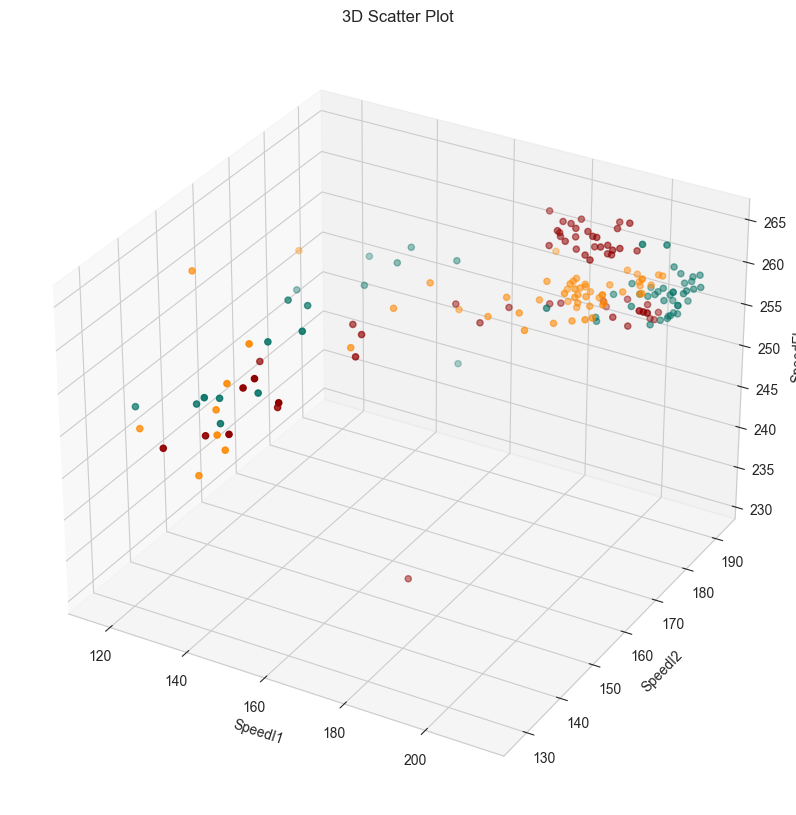

In [72]:
from mpl_toolkits import mplot3d # Import the 3D part of the matplotlib library

plt_data = data.loc[data.Driver.isin(['ALO', 'BOT', 'PIA'])]
plt.figure(figsize = (10,12)); # Size of the plot
ax = plt.axes(projection = '3d') # Specify the plot type
ax.scatter3D(plt_data['SpeedI1'], plt_data['SpeedI2'], plt_data['SpeedFL'], c = plt_data['Driver'].apply(lambda x: driver_colors[x]))
plt.xlabel('SpeedI1')
plt.ylabel('SpeedI2')
ax.set_zlabel('SpeedFL')

plt.title('3D Scatter Plot')

#### **Relationships: *Heat maps***
This type of graph is very common when we have a table with data (``pivot_table``, for example) and want to facilitate the immediate identification of patterns, trends, and outliers.

Text(0.5, 1.0, 'Heatmap')

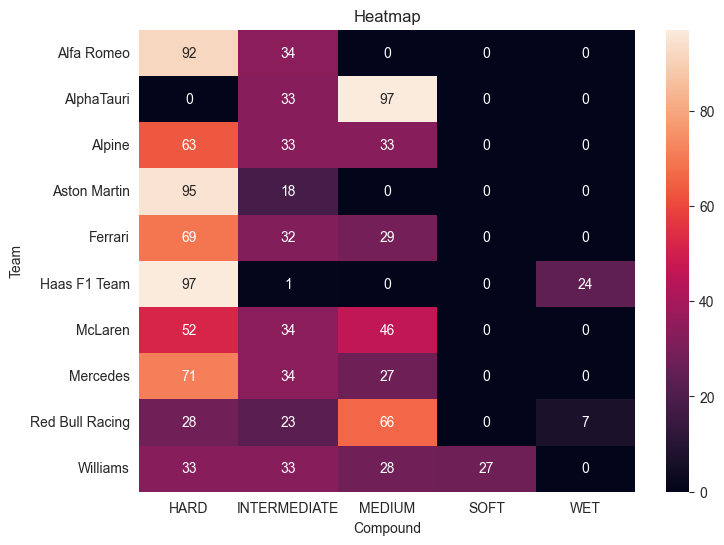

In [73]:
plt_data = data.pivot_table(index=["Team"], columns=["Compound"], values="LapNumber", aggfunc="count", fill_value=0)

plt.figure(figsize=(8,6)); # Size of the plot
sns.heatmap(plt_data, annot=True)
plt.title("Heatmap")

#### **Relationships: *Multiple variables with dimensionality reduction***

When working with data that has many dimensions (more than 2), it is difficult to visualize them directly. To understand their structure and find patterns, we need to reduce the number of dimensions without losing too much information. PCA and t-SNE are two methods that help us visualize high-dimensional data by reducing it to 2D or 3D.

To use these methods, we need to first install the scikit-learn library:

In [74]:
! pip install scikit-learn

   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 8.9/8.9 MB 79.1 MB/s  0:00:00
   ---------------------------------------- 0.0/41.3 MB ? eta -:--:--
   ------------------------ --------------- 24.9/41.3 MB 121.4 MB/s eta 0:00:01
   ---------------------------------------- 41.3/41.3 MB 104.9 MB/s  0:00:00

   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ----------

**PCA: Visualize the laps of 3 drivers based on 6 variables: the time in each of the 3 sectors and the maximum speeds.**

Text(0.5, 1.0, 'Dimensionality Reduction with PCA')

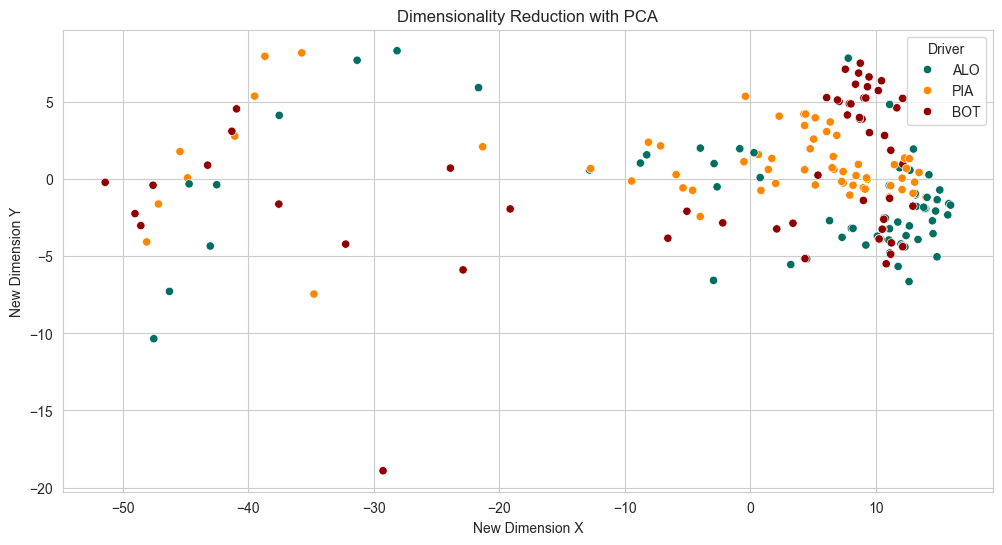

In [75]:
from sklearn.decomposition import PCA # Import PCA

filtered_data = data.loc[data.Driver.isin(['ALO', 'BOT', 'PIA'])].copy() # It's better to make a copy if modifications are to follow
# Convert sector times from timedelta to float
filtered_data[['Sector1Time', 'Sector2Time', 'Sector3Time']] = filtered_data[['Sector1Time', 'Sector2Time', 'Sector3Time']].apply(lambda x: x.dt.total_seconds())
# Select the columns to represent
data_6D = filtered_data[['Sector1Time', 'Sector2Time', 'Sector3Time', 'SpeedI2', 'SpeedFL', 'SpeedST']]

pca = PCA(n_components = 2, random_state = 10) # Configure to reduce to 2 dimensions and set the seed.
new_2D_data = pca.fit_transform(data_6D.values) # Transform the data to 2 dimensions

plt.figure(figsize = fig_size); # Size of the plot
the_plot = sns.scatterplot(x = new_2D_data[:,0], y = new_2D_data[:,1], hue = filtered_data['Driver'], palette = driver_colors); # Scatter plot
the_plot.set_xlabel('New Dimension X')
the_plot.set_ylabel('New Dimension Y')
the_plot.set_title('Dimensionality Reduction with PCA')

**t-SNE: Visualize the laps of 3 drivers based on 6 variables: the time in each of the 3 sectors and the maximum speeds.**

Text(0.5, 1.0, 'Dimensionality Reduction with t-SNE')

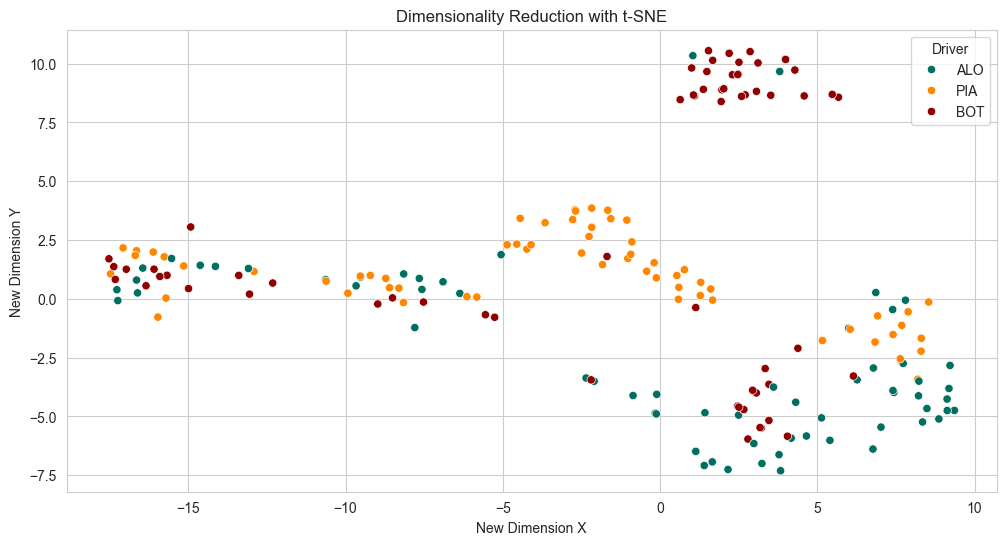

In [76]:
from sklearn.manifold import TSNE # Import tSNE

tsne = TSNE(n_components = 2, random_state = 10) # Configure to reduce to 2 dimensions and set the seed.
new_2D_data = tsne.fit_transform(data_6D.values) # Transform the data to 2 dimensions

plt.figure(figsize = fig_size); # Size of the plot
the_plot = sns.scatterplot(x = new_2D_data[:,0], y = new_2D_data[:,1], hue = filtered_data['Driver'], palette = driver_colors); # Scatter plot
the_plot.set_xlabel('New Dimension X')
the_plot.set_ylabel('New Dimension Y')
the_plot.set_title('Dimensionality Reduction with t-SNE')

<div class="alert alert-block alert-info">
    <b>Exercise:</b> Modify the previous plot so that each point is colored based on the tire instead of the driver.
</div>

Text(0.5, 1.0, 'Dimensionality Reduction with t-SNE')

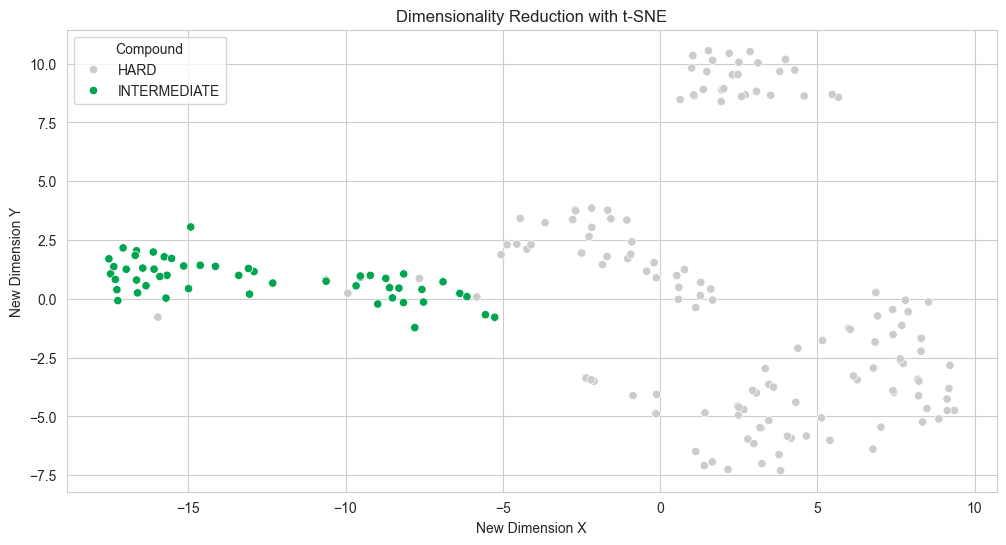

In [78]:
# Your code here
from sklearn.manifold import TSNE # Import tSNE

tsne = TSNE(n_components = 2, random_state = 10) # Configure to reduce to 2 dimensions and set the seed.
new_2D_data = tsne.fit_transform(data_6D.values) # Transform the data to 2 dimensions

plt.figure(figsize = fig_size); # Size of the plot
the_plot = sns.scatterplot(x = new_2D_data[:,0], y = new_2D_data[:,1], hue = filtered_data['Compound'], palette = tire_colors); # Scatter plot
the_plot.set_xlabel('New Dimension X')
the_plot.set_ylabel('New Dimension Y')
the_plot.set_title('Dimensionality Reduction with t-SNE')

### **2.2. Dynamic Visualization**
In this last section, we will use the Bokeh library.

This library generates HTML code instead of producing a static image.

In [79]:
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.io import output_notebook

output_notebook() # Configure Bokeh

Loading BokehJS ...

In [80]:
# Create a ColumnDataSource object that contains all the relevant data for the plot
source = ColumnDataSource(data = dict(
    x = new_2D_data[:,0],
    y = new_2D_data[:,1],
    driver = filtered_data['Driver'],
    color = filtered_data['Driver'].apply(lambda x: driver_colors[x]),
    lap_time = filtered_data['LapTime'].dt.total_seconds(),
    lap_number = filtered_data['LapNumber'],
    compound = filtered_data['Compound'],
    tire_life = filtered_data['TyreLife'],
    )
)

# Customize the information to display when hovering the mouse
TOOLTIPS = """
    <div>
        <div style="padding-right:5px;padding-left:5px">
            <span style="font-size: 20px; color: @color;"><strong>@driver</strong></span>
            <ul style="font-size: 15px; margin-left:-20px; margin-top:0px">
                <li><strong>Lap: </strong>@lap_number</li>
                <li><strong>Tire: </strong>@compound</li>
                <li><strong>Lap Time: </strong>@lap_time</li>
                <li><strong>Tyre life: </strong>@tire_life</li>
            </ul>
        </div>
    </div>
"""

# Create the plot
p = figure(width = 1000, height = 600, tooltips = TOOLTIPS)
p.scatter(source = source, x = 'x', y = 'y', fill_color = 'color', line_color = None, size = 7)
show(p)

<div class="alert alert-block alert-info">
    <b>Exercise:</b> Modify the previous plot so that each point is colored based on the tire instead of the driver.
</div>

In [ ]:
# Your code here
source = ColumnDataSource(data = dict(
    x = new_2D_data[:,0],
    y = new_2D_data[:,1],
    driver = filtered_data['Driver'],
    color = filtered_data['Compound'].apply(lambda x: tire_colors[x]),
    lap_time = filtered_data['LapTime'].dt.total_seconds(),
    lap_number = filtered_data['LapNumber'],
    compound = filtered_data['Compound'],
    tire_life = filtered_data['TyreLife'],
    )
)

# Customize the information to display when hovering the mouse
TOOLTIPS = """
    <div>
        <div style="padding-right:5px;padding-left:5px">
            <span style="font-size: 20px; color: @color;"><strong>@driver</strong></span>
            <ul style="font-size: 15px; margin-left:-20px; margin-top:0px">
                <li><strong>Lap: </strong>@lap_number</li>
                <li><strong>Tire: </strong>@compound</li>
                <li><strong>Lap Time: </strong>@lap_time</li>
                <li><strong>Tyre life: </strong>@tire_life</li>
            </ul>
        </div>
    </div>
"""

# Create the plot
p = figure(width = 1000, height = 600, tooltips = TOOLTIPS)
p.scatter(source = source, x = 'x', y = 'y', fill_color = 'color', line_color = None, size = 7)
show(p)

